In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

exact_value = 0.77143

def an(n: int):
    return 24 / (7 * (n ** 2 + 8 * n + 15))


In [6]:
def count_correct_significant_digits(error, value):
    if error > value:
        return 0

    error_string = str(format(float(error), 'f'))

    counter = 0
    for digit_error in error_string:
        if digit_error.isdigit():
            err = float(digit_error)
            if err <= 1:
                counter += 1
            else:
                break
    return counter

In [7]:
def calculate_error(N: int, exact_value: float):
    partial_sum = 0
    for i in range(1, N):
        partial_sum += an(i)
    error = np.abs(exact_value - partial_sum)

    correct_numbers = count_correct_significant_digits(error, exact_value)
    return partial_sum, error, correct_numbers

In [8]:
M_array = []
N_array = []
for N in [10, 10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5]:
    data = calculate_error(N, exact_value)
    M_array.append(data[2])
    N_array.append(N)
    print(f"S({N}) = {data[0]}, d({N}) = {data[1]}, M = {data[2]}")

S(10) = 0.5171114599686029, d(10) = 0.2543185400313971, M = 1
S(100) = 0.7383015043209216, d(100) = 0.033128495679078385, M = 2
S(1000) = 0.7680119572982819, d(1000) = 0.0034180427017180826, M = 3
S(10000) = 0.771085834242873, d(10000) = 0.0003441657571269241, M = 4
S(100000) = 0.771394286914239, d(100000) = 3.5713085761002183e-05, M = 5


Text(0.5, 1.0, 'Гистограмма количества верных цифр к размеру частичной суммы')

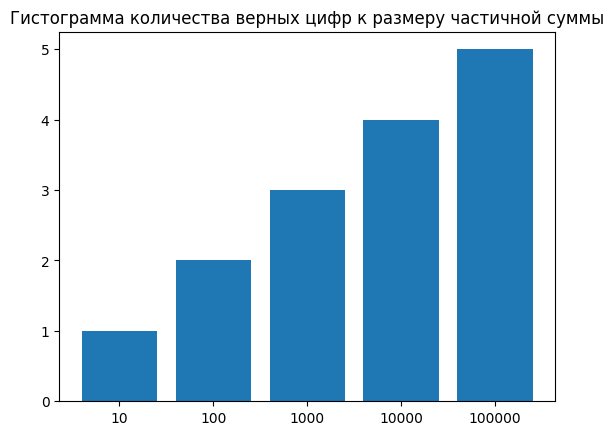

In [9]:
plt.bar(M_array, (M_array + [0])[0:-1])
plt.xticks((M_array + [0])[0:-1], N_array)
plt.title("Гистограмма количества верных цифр к размеру частичной суммы")

In [12]:
delta = 0.01
a1, a2, a3, a4, a5 = sp.symbols("a1 a2 a3 a4 a5")
matrix_a = sp.Matrix([
    [a1, 1, a5],
    [5, a2, 15],
    [a4, 5, a3]
])
print(f"Exact determinant: {matrix_a.det().subs([(a1, 3), (a2, 3), (a3, 40), (a4, 11), (a5, 13)])}")

exact_determinant = matrix_a.det().subs([(a1, 3), (a2, 3), (a3, 40), (a4, 11), (a5, 13)])

for case in [1 + delta, 1 - delta]:
    for aii, i in zip([a1, a2, a3, a4, a5], [(0, 0), (1, 1), (2, 2), (0, 2), (2, 0)]):
        new_matrix = matrix_a.copy()
        new_matrix[i[0], i[1]] = new_matrix[i[0], i[1]] * case
        determinant = new_matrix.det()

        derivative = sp.diff(determinant, aii)

        relative_error = ((sp.Abs(derivative) * sp.Abs(aii)) / sp.Abs(determinant))  * delta
        absolute_error = relative_error * sp.Abs(aii)

        significant_digits = count_correct_significant_digits(absolute_error.subs([(a1, 3), (a2, 3), (a3, 40), (a4, 11), (a5, 13)]), abs(exact_determinant))

        print(f"{aii}: {case}; Relative error = {relative_error.subs([(a1, 3), (a2, 3), (a3, 40), (a4, 11), (a5, 13)])}, Absolute error = {absolute_error.subs([(a1, 3), (a2, 3), (a3, 40), (a4, 11), (a5, 13)])}, True numbers: {significant_digits}")

Exact determinant: -4
a1: 1.01; Relative error = 0.514528301886792, Absolute error = 1.54358490566037, True numbers: 1
a2: 1.01; Relative error = 0.148592750533046, Absolute error = 0.445778251599139, True numbers: 1
a3: 1.01; Relative error = 0.673333333333332, Absolute error = 26.9333333333333, True numbers: 0
a4: 1.01; Relative error = 0.532321428571420, Absolute error = 5.85553571428562, True numbers: 0
a5: 1.01; Relative error = 0.163087349397589, Absolute error = 2.12013554216865, True numbers: 0
a1: 0.99; Relative error = 0.249813084112150, Absolute error = 0.749439252336449, True numbers: 1
a2: 0.99; Relative error = 0.206374622356501, Absolute error = 0.619123867069502, True numbers: 1
a3: 0.99; Relative error = 0.282857142857143, Absolute error = 11.3142857142857, True numbers: 0
a4: 0.99; Relative error = 0.877398648648672, Absolute error = 9.65138513513539, True numbers: 0
a5: 0.99; Relative error = 0.733161764705920, Absolute error = 9.53110294117697, True numbers: 0


In [2]:
def machine_zero(type):
    k = 0
    value = type(1)
    while value != 0:
        value = type(value / 2)
        k += 1
    print(f"{type.__name__}: Машинный ноль = 2^-{k}")


def machine_infinity(type):
    k = 0
    value = type(1)
    while value != np.inf:
        value = type(value * 2)
        k += 1
    print(f"{type.__name__}: Машинная бесконечность = 2^{k}")


def machine_epsilon(type):
    k = 0
    value = type(1)
    while type(1.) + value > type(1.):
        value = type(value / 2)
        k += 1
    print(f"{type.__name__}: Машинное эпсилон = 2^-{k}")


for my_type in [np.single, np.double, np.longdouble]:
    machine_zero(my_type)
    machine_infinity(my_type)
    machine_epsilon(my_type)
    print()

float32: Машинный ноль = 2^-150
float32: Машинная бесконечность = 2^128
float32: Машинное эпсилон = 2^-24

float64: Машинный ноль = 2^-1075
float64: Машинная бесконечность = 2^1024
float64: Машинное эпсилон = 2^-53

longdouble: Машинный ноль = 2^-16446
longdouble: Машинная бесконечность = 2^16384
longdouble: Машинное эпсилон = 2^-64



/tmp/ipykernel_4421/1096479471.py:14: RuntimeWarning: overflow encountered in cast
  value = type(value * 2)
/tmp/ipykernel_4421/1096479471.py:14: RuntimeWarning: overflow encountered in scalar multiply
  value = type(value * 2)


In [3]:
from itertools import product

def inverse_matrix_check(matrix):
    print(f'Без погрешности: detA = {np.linalg.det(matrix)}\n')


def inverse_matrix_check_error(matrix, delta):
    determinants = []
    for j in list(product([-1, 1], repeat=9)):
        determinants.append(
            np.linalg.det(
                matrix * (1 + delta * np.array(j).reshape(3, 3))
            )
        )

    min_determinant, max_determinant = np.min(determinants), np.max(determinants)
    print(f'Минимальный определитель = {min_determinant}')
    print(f'Максимальный определитель = {max_determinant}')

    if min_determinant < 0 < max_determinant:
        print(f"С погрешностью {delta}: определитель может быть 0\n")
    else:
        print(f"С погрешностью {delta}: определитель не может быть 0\n")


matrix = np.array([
    [3, 1, 13],
    [13.4, 11.4, 23],
    [5, 3, 15]
])
inverse_matrix_check(matrix)
inverse_matrix_check_error(matrix, 0.05)
inverse_matrix_check_error(matrix, 0.1)

Без погрешности: detA = 1.5999999999999945

Минимальный определитель = -129.94380000000007
Максимальный определитель = 120.61580000000012
С погрешностью 0.05: определитель может быть 0

Минимальный определитель = -274.01439999999997
Максимальный определитель = 233.52960000000022
С погрешностью 0.1: определитель может быть 0

